# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [3]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [16]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        for i in range(1,n+1):
            positions[i] = self.pickStep() + positions[i-1]
        return positions

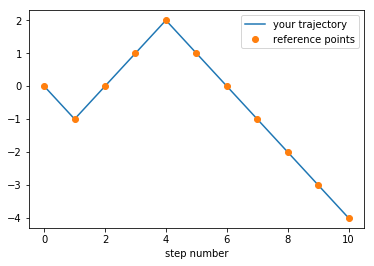

In [17]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

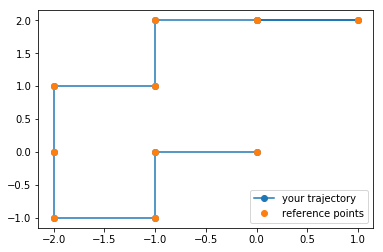

In [18]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

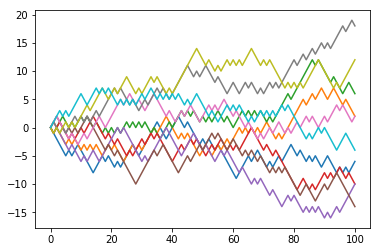

In [19]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


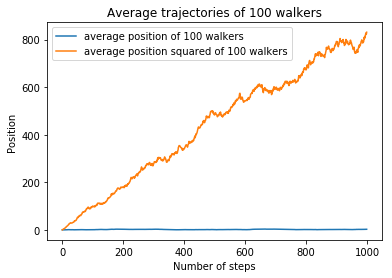

In [32]:
nsteps = 1000
ndim = 1
nwalkers = 100

w = walker(numpy.zeros(1))

tot_pos = w.doSteps(nsteps)
tot_pos_squared = tot_pos**2

for i in range(1,nwalkers):
    pos_now = w.doSteps(nsteps)
    tot_pos += pos_now
    tot_pos_squared += pos_now**2

avg_pos = tot_pos/nwalkers
avg_pos_squared = tot_pos_squared/nwalkers

plt.plot(range(0,nsteps),avg_pos,label = 'average position of %d walkers' %nwalkers)
plt.plot(range(0,nsteps),avg_pos_squared,label = 'average position squared of %d walkers' %nwalkers)
plt.xlabel('Number of steps')
plt.ylabel('Position')
plt.title('Average trajectories of %d walkers' %nwalkers )    
plt.legend(loc = 'upper left')    

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


1298.0000080769096
1541.9999136123952
3142.0001206890593
982.000031226562
2281.9999135717662
1146.0000830214121
793.9999780941434
6790.000402518548
2822.000152155306
9525.999474161305
2846.000104136998
3278.000171012769
1489.999933739251
4890.000071779883
16105.999919902592
11902.000620144012
1402.0000192272128
13725.999867207429
4481.999710008735
329.99996582983295
577.9999630199891
7461.99952209281
2369.999816157637
5098.000528645003
1278.0000408174383
2466.000029100629
2381.9999193825206
1346.0000869241194
622.0000113790775
702.0000279709384
7334.000414919341
805.9999712090976
1310.0001309125219
681.9999872779626
4777.999828220345
1161.9998915123288
9618.000185130222
1405.999957710097
3978.0000151047134
2361.9998970190645
942.0000001513436
5466.000296817161
626.0000411316432
3050.0001717209816
10605.99992220808
1738.0000057229918
11838.000143345038
1861.9999964576127
6910.000278557709
22334.00176393334
5989.999676835781
1930.0001086900156
3778.0001721347217
2317.999840203105
5066.00

11575.999679953384
5490.000239512941
2114.000045545632
4034.000083040679
3151.9997868777864
824.0000159661904
3902.00015328046
3512.000139525393
2363.999999922831
2806.000061340761
2395.999874603527
7793.999391499907
2515.9999444989953
2714.0000427933555
9677.999387251271
9001.99961251166
7232.000291013159
8239.999788821675
3274.0001940895454
1544.0000481703464
2189.9999937579414
6414.000568429998
4742.00019480288
10854.000237337837
12200.000686883926
2816.000151949833
6219.999568508007
1068.0001223513536
2047.9999298999464
8423.999520555139
3068.0000537699234
1561.9998914633325
3054.0000662142993
3262.0000998312607
2514.000029402101
8257.999391794205
3081.999866981292
2147.9998670030036
3022.00006512228
6928.00055342546
5059.9996651691035
3536.0000441026787
3926.0002243782073
3287.999860005817
3536.0000441026787
1686.000149800806
6334.000383026956
1756.0001489315764
2644.000127277235
4144.000159500225
7035.999849408923
1699.9999964708113
2182.000064314343
2509.9999090677593
2739.99995

4976.000441610813
4643.999483814696
5087.999636728549
5815.999860003649
3891.9998669261113
2746.0000333218486
2768.000014395453
2439.9998552073375
5283.999502917344
1863.9998572134064
3206.000095815398
7514.000454135472
4007.999777912759
3876.0000681481906
5118.000112991373
3626.0001453468576
6343.999992046505
6837.999892387539
4717.999906579265
5198.000528998731
1766.0000783354044
8010.000085872656
7044.000345347682
4395.999977388419
5904.000468292274
6968.000220540911
6270.000438876683
13819.999645064177
1119.9999387646094
2772.000166213198
4305.999779701233
5261.999709942378
6463.99953468726
1433.9998718432762
2768.000014395453
5320.000217175635
3884.000127465464
2849.9999973515514
1915.9999502533028
3532.0002035507932
5106.000461541349
7061.999810043722
7855.999956542859
5099.999923874217
2621.9998736405396
3246.0000519475434
5300.000406487146
2332.00008427375
3791.9998435956077
2542.000037690217
11451.999448745104
3487.999952594997
9332.000436105067
3936.0000329613686
2775.9999905

4188.000139422307
7050.00017734454
1660.0001334515546
10340.000094473362
4897.999624365999
2505.9999182203464
6403.9996481323615
8364.000614015618
4542.0002185388
1445.9999595917761
4309.999834636459
10753.99950723187
10518.000682168698
2439.9998552073375
3626.0001453468576
1830.0000283070985
5175.999549112807
5412.000413071597
8274.000411626184
3658.0001512858
3383.999883493001
7683.999364335614
3743.999786913395
1696.0001034604065
8453.999415738741
4435.999837563373
4027.9999265063234
2413.9999023040436
3487.999952594997
797.9999974091188
3885.999766375302
3289.999874845147
5925.99961674423
2975.9999953806982
3322.000142937759
1816.0000033123797
2319.9999716850143
2074.0000869045616
3887.9999198997975
7757.999363183568
2683.9999494306394
8349.999932914565
3297.9998811707483
3527.9999075643864
2425.9998900166247
9434.000716224313
4300.000177530805
12413.999462570588
4972.000390594418
3699.9999965542374
3096.00013529243
2064.000001659675
4632.000222546572
1992.0000981242047
3894.000135

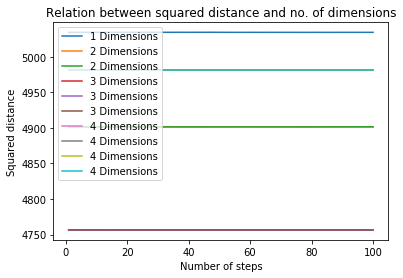

In [46]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

for i in range(1,len(dimensions)+1):
    w = walker(numpy.zeros(i),i)
    
    pos_now = (w.doSteps(nsteps-1))
    tot_pos_squared  = pos_now**2

    for j in range(1,nwalkers):
        pos_now = numpy.linalg.norm(w.doSteps(nsteps-1))
        #print(pos_now)
        tot_pos_squared += pos_now**2
        #print(pos_now**2)
    print(tot_pos_squared)
    avg_pos_squared = tot_pos_squared/nwalkers
    
    plt.plot(range(1,nsteps+1),avg_pos_squared, label = '%d Dimensions' %i)

plt.xlabel('Number of steps')
plt.ylabel('Squared distance')
plt.title('Relation between squared distance and no. of dimensions')
plt.legend(loc = 'upper left')

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


In [ ]:
ndim=2
nwalkers=500


w = walker(numpy.zeros(ndim),ndim,0.05)
rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)